In [11]:
import sys
import numpy as np

from pyDFCSR_2D import CSR2D
import matplotlib.pyplot as plt
from matplotlib import cm
import h5py
from pyDFCSR_2D.tools import plot_surface

## Run DFCSR

In [8]:
testCSR = CSR2D(input_file= 'input/chicane_config.yaml')

start reinterpolation. number of slice 1
xbins = 500  zbins =  500


In [10]:
testCSR.CSR_params.compute_CSR = 1
testCSR.run()

Starting the DFCSR run


TypeError: CSR2D.get_bmadx_element() got an unexpected keyword argument 'type'

## Parallel Run with MPI

In [4]:
# input yaml file in "./input/dipole_config.yaml"
!mpirun -n 4 python  -m pyDFCSR_mpi_run ./input/chicane_config.yaml

'mpirun' is not recognized as an internal or external command,
operable program or batch file.


## Plot output

In [4]:
from pyDFCSR_2D.postprocessor import DFCSR_postprocessor

DFplot = DFCSR_postprocessor(run_name = 'dipole_chirp-2024-06-17T20_36_27-07_00',
                             work_dir = './output')

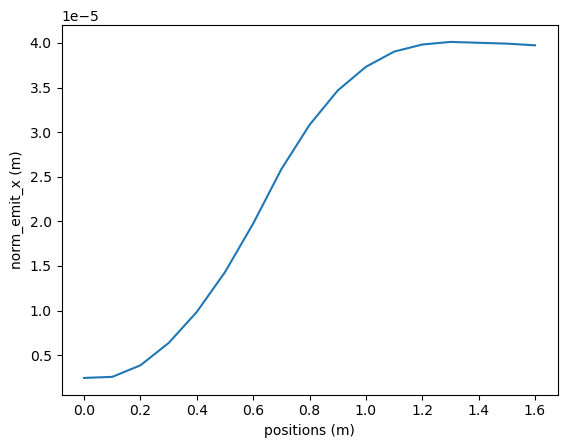

In [5]:
# Plot beam size along the lattice
# Plot beam size along the lattice
x, y = DFplot.get_statistics(key = 'norm_emit_x', show_plot = True)

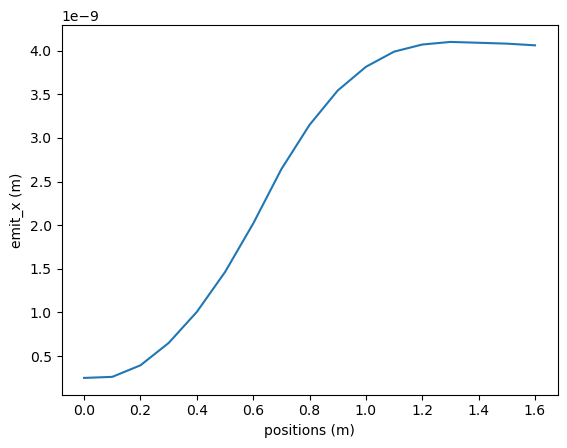

In [6]:
x, y = DFplot.get_statistics(key = 'emit_x', show_plot = True)

plot longitudinal wakes at nearest point s  = 0.8999999999999999 m, step count 9
ebeam energy 5000000026.237007


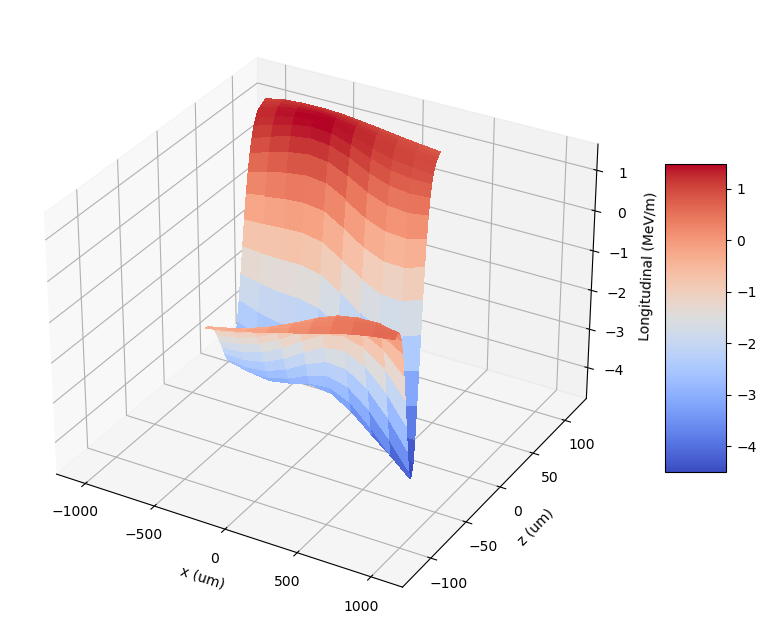

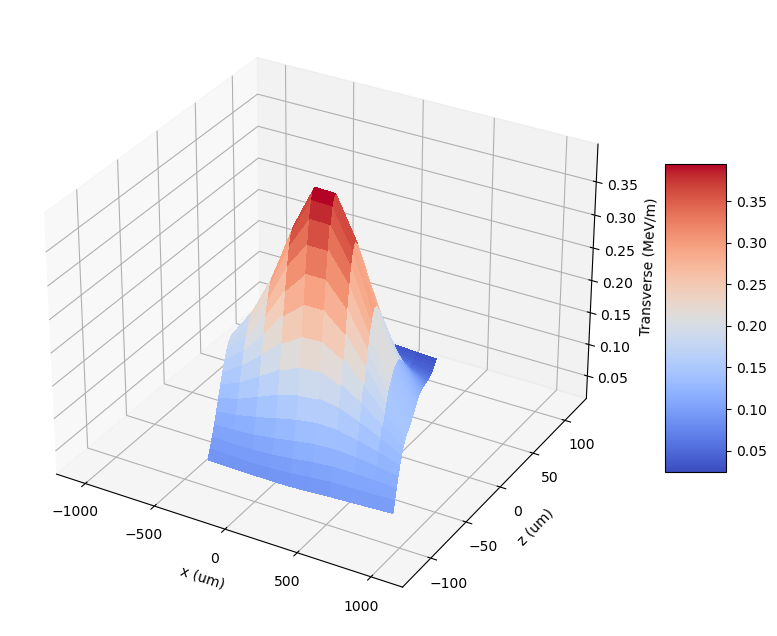

In [7]:
x_grids, z_grids, xkicks, dE_dct = DFplot.get_wakes(s = 0.9, show_plot = True)

Reading  C:\Users\yingb\Desktop\pyDFCSR\pyDFCSR_2D\example\output\dipole_chirp-2024-06-17T20_36_27-07_00-particles-12.h5


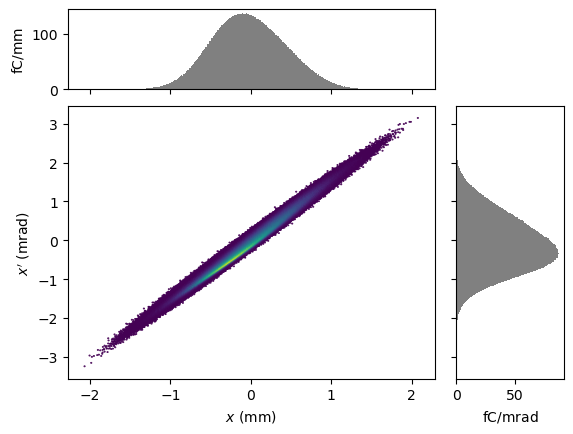

In [8]:
from pmd_beamphysics.plot import density_and_slice_plot
pg  = DFplot.get_particles(step = 12)
pg.plot('x', 'xp')